# Business Case : The classification goal is to predict if the client will subscribe a term deposit  or not.

# Domain analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv(r'\Users\PUJARI SRIHARI BABU\Downloads\Data\bank-additional\bank-additional-full.csv',';')
pd.set_option('display.max_columns',None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Step 1 -Basic checks 

In [9]:
#  calling first five rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Calling last five rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [11]:
data.describe()
# Checking categorical variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# Checking categorical variables
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
# Checking null counnt and data type
data.info()
# discrete values - Age,emp.var.rate,euribor3m.
# continuous values - Balance,Duration,Pdays,campaign,previous,nr.employed,cons.conf.idx,cons.price.idx .
# object - job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Step 2 - Exploratory data analysis

### 1.Univariate Analysis

In [14]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights of univariate analysis

### Bivariate analysis

In [15]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [16]:
data.select_dtypes(include=['int64','float64']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [17]:
# Bivariant analysis
data1 = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']]
data2 = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

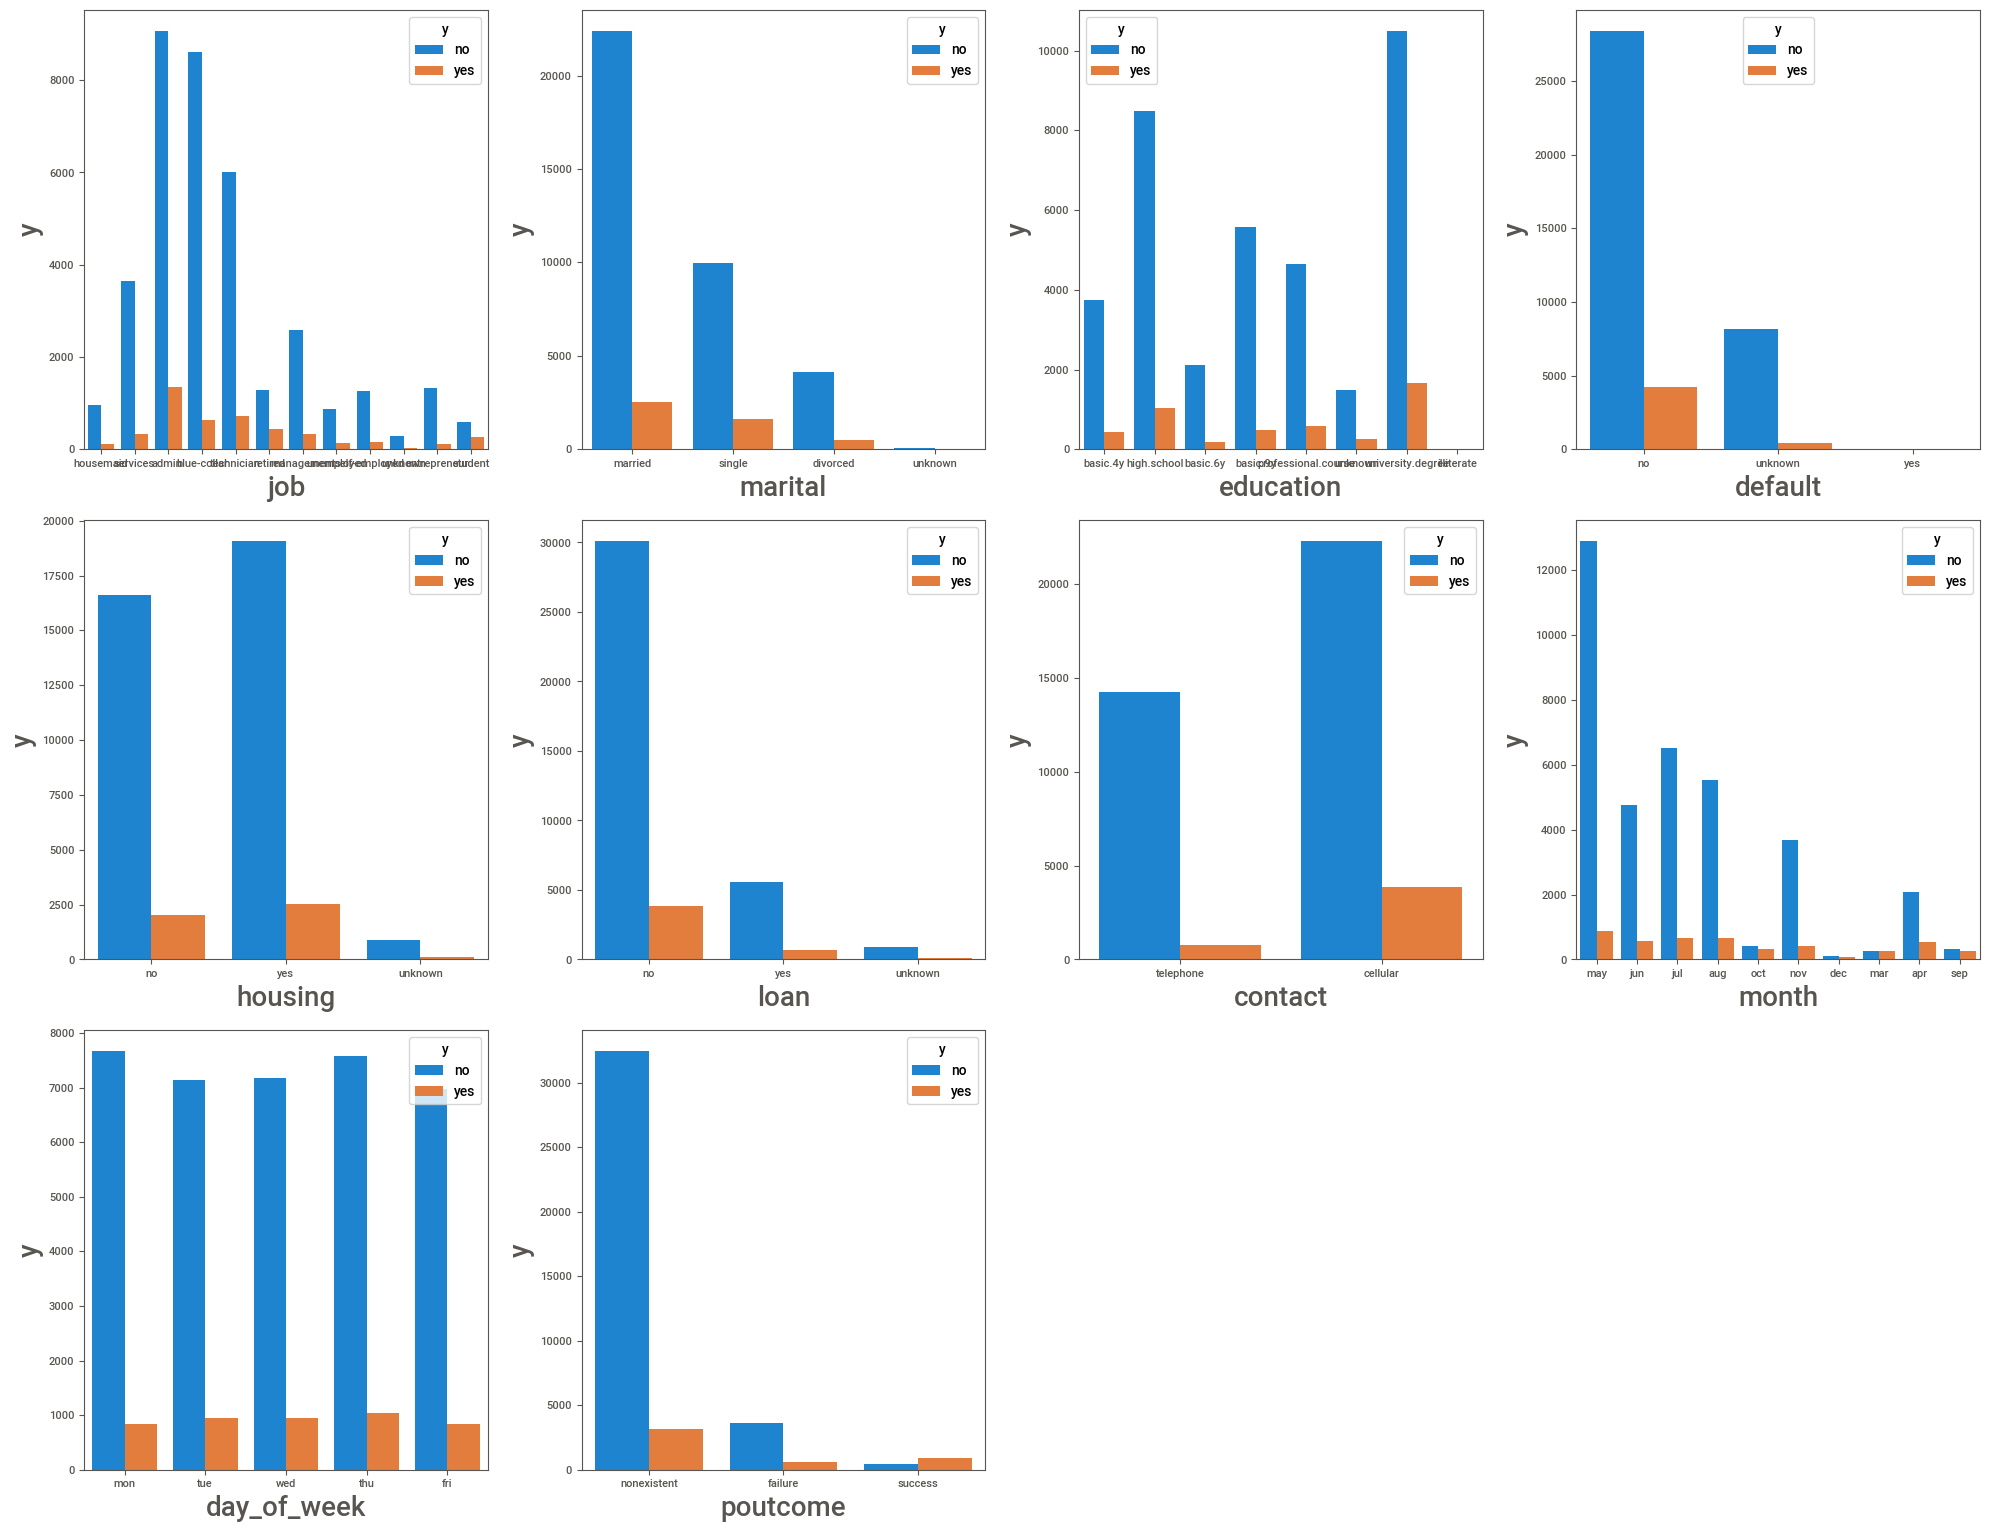

In [18]:
plt.figure(figsize=(20,20),facecolor='white')#defining canvas size
plotnumber = 1 # counter
for column in data1:# accessing columns from dataset
    if plotnumber<=16: # set the limit
        ax = plt.subplot(4,4,plotnumber) # plotting the graphs
        sns.countplot(x=data1[column],hue=data['y'])
        plt.xlabel(column,fontsize=20) # assigning name to x-axis & font size is 20
        plt.ylabel('y',fontsize=20) # assigning name to y-axis & font size is 20
    plotnumber+=1 #counter increment
plt.tight_layout()#used to hide storage location

    

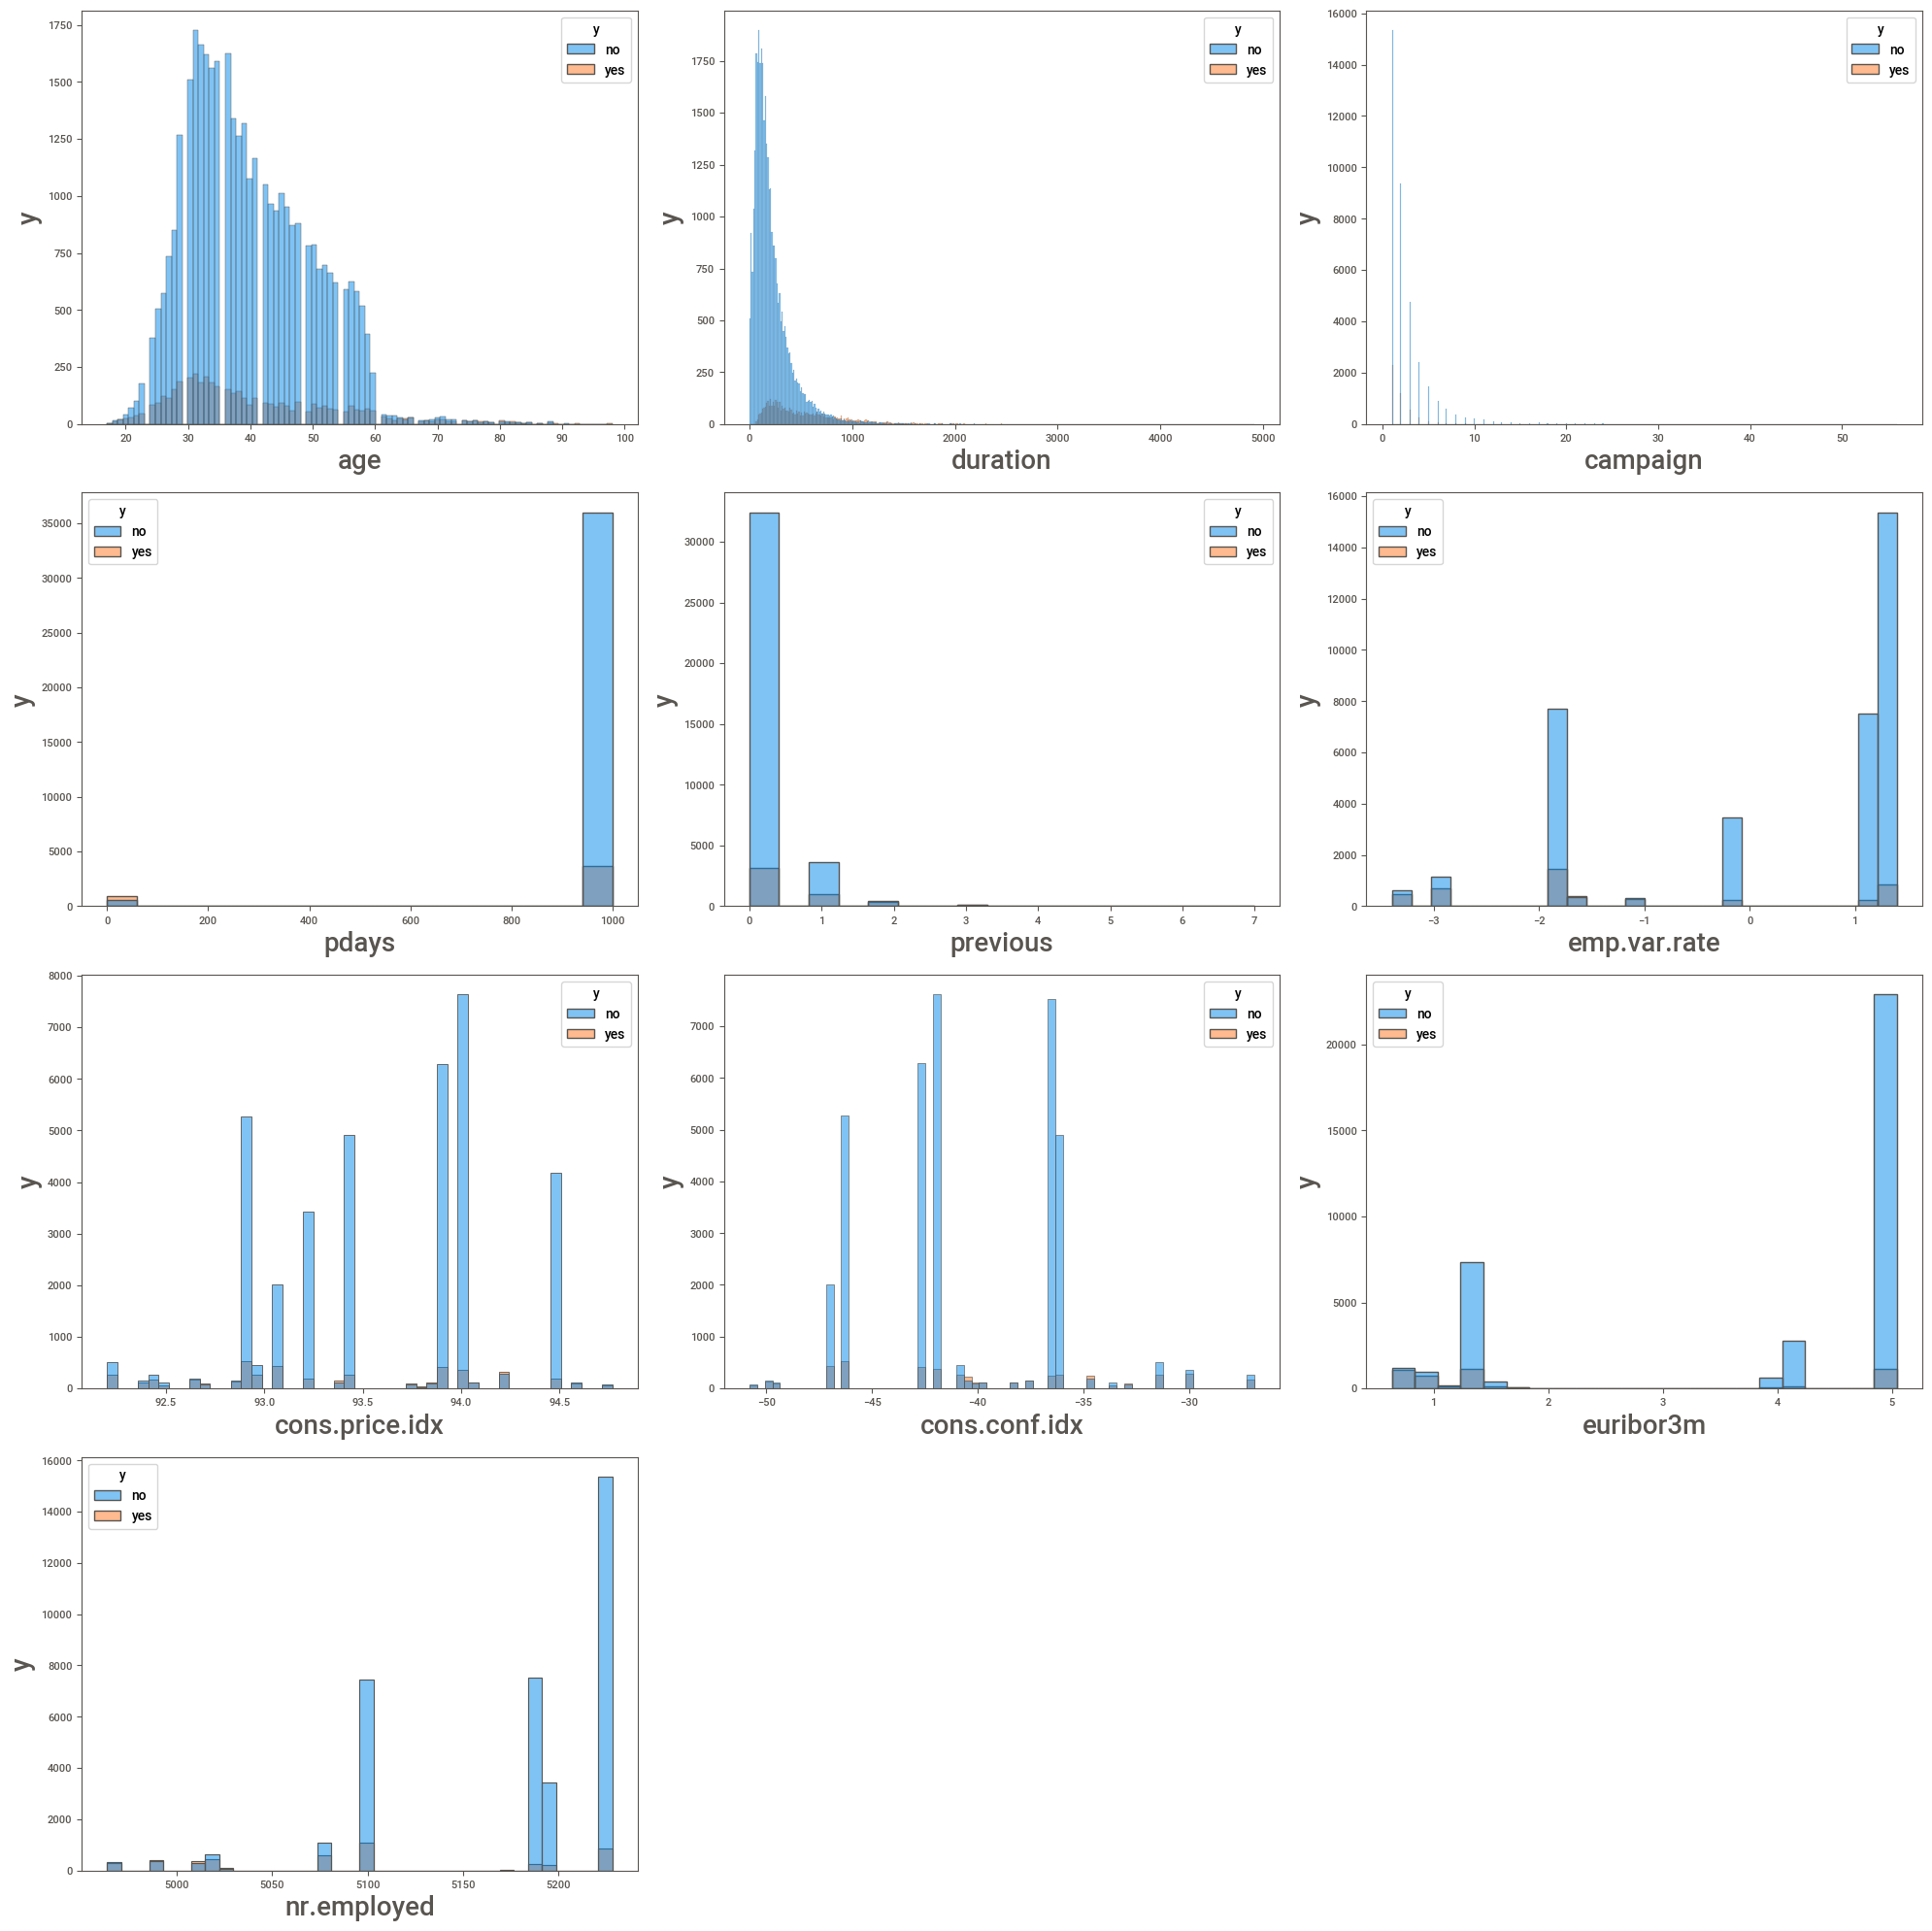

In [19]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data2[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

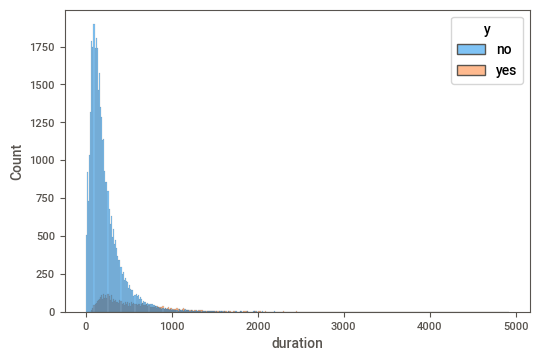

In [20]:
sns.histplot(x='duration',hue='y',data=data)
plt.show()

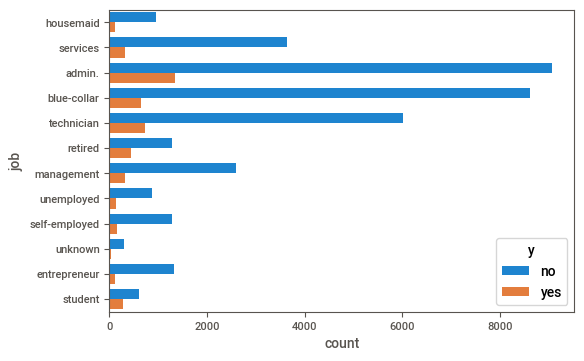

In [21]:
sns.countplot(y='job',hue='y',data=data)
plt.show()

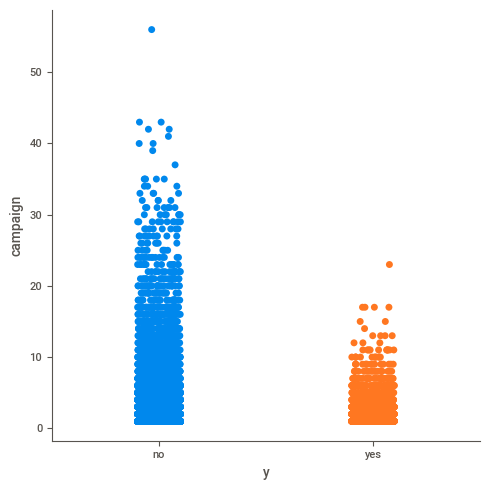

In [22]:
sns.catplot(y='campaign',x='y',data=data)
plt.show()

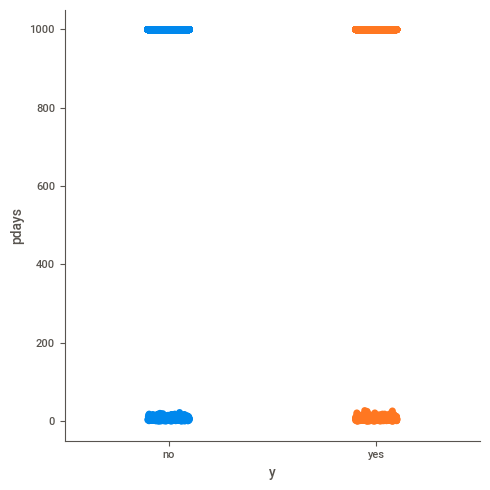

In [23]:
sns.catplot(y='pdays',x='y',data=data)
plt.show()

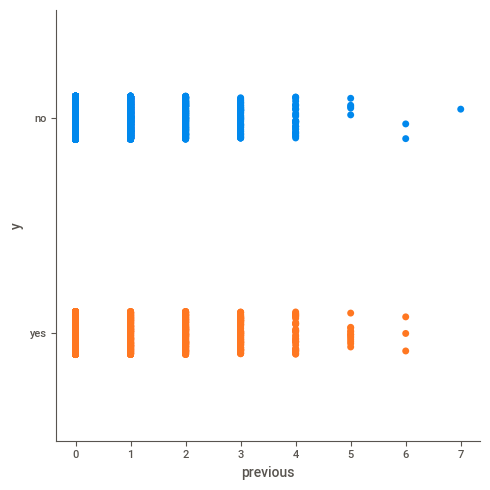

In [24]:
sns.catplot(x='previous',y='y',data=data)
plt.show()

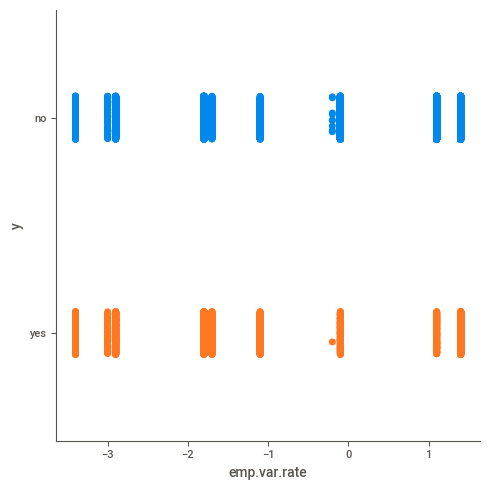

In [25]:
sns.catplot(x='emp.var.rate',y='y',data=data)
plt.show()

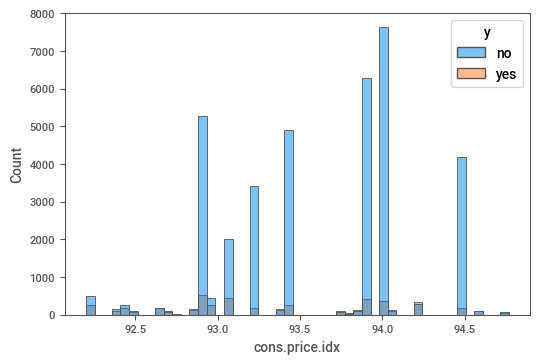

In [26]:
sns.histplot(x='cons.price.idx',hue='y',data=data)
plt.show()

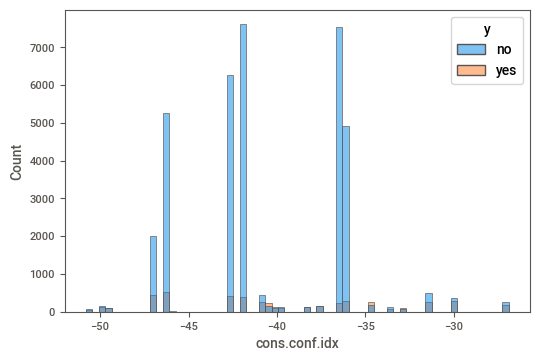

In [27]:
sns.histplot(x='cons.conf.idx',hue='y',data=data)
plt.show()

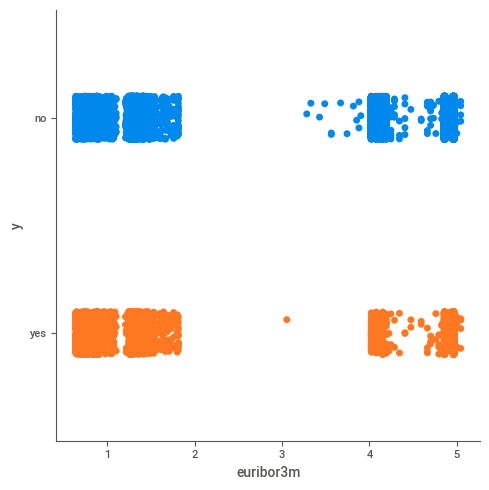

In [28]:
sns.catplot(x='euribor3m',y='y',data=data)
plt.show()

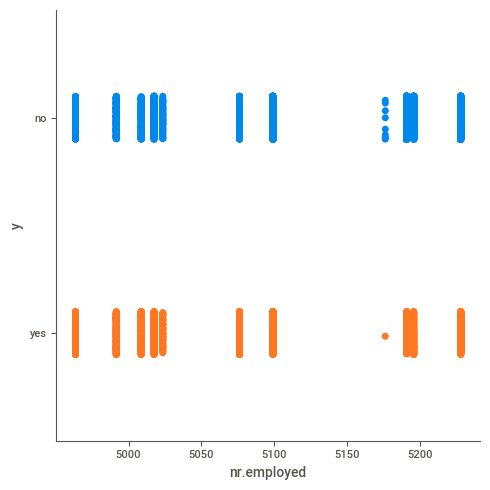

In [29]:
sns.catplot(x='nr.employed',y='y',data=data)
plt.show()

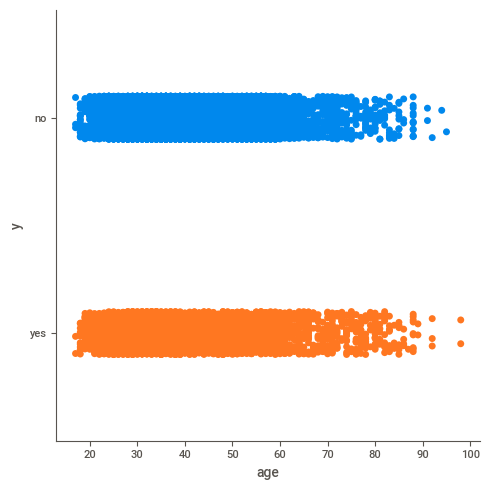

In [30]:
sns.catplot(x='age',y='y',data=data)
plt.show()

### Insights of  bivariant analysis`

## Step 3 - Data preprocessing and Feature engineering

In [31]:
# Step 1 - Checking missing values
data.isnull().sum()
# There are no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [34]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [3]:
# Assigning the unknown values with high frequency values
data['job'] = data.loc[:,'job'].replace({'unknown':'admin.'})
data['marital'] = data.loc[:,'marital'].replace({'unknown':'married'})
data['education'] = data.loc[:,'education'].replace({'unknown':'university.degree'})
data['default'] = data.loc[:,'default'].replace({'unknown':'no'})
data['housing'] = data.loc[:,'housing'].replace({'unknown':'yes'})
data['loan'] = data.loc[:,'loan'].replace({'unknown':'no'})

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
data.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [4]:
# Step 2 - Converting categorical data into numerical data
from category_encoders import CountEncoder
fre_enc = CountEncoder(cols=['job','education','contact','poutcome'],normalize=True,return_df=True).fit(data).transform(data)

In [5]:
fre_enc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025736,married,0.101389,no,no,no,0.365252,may,mon,261,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096363,married,0.231014,no,no,no,0.365252,may,mon,149,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096363,married,0.231014,no,yes,no,0.365252,may,mon,226,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.261047,married,0.055647,no,no,no,0.365252,may,mon,151,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096363,married,0.231014,no,no,yes,0.365252,may,mon,307,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041760,married,0.127294,no,yes,no,0.634748,nov,fri,334,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.224677,married,0.127294,no,no,no,0.634748,nov,fri,383,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.041760,married,0.337453,no,yes,no,0.634748,nov,fri,189,2,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.163713,married,0.127294,no,no,no,0.634748,nov,fri,442,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.marital = lb.fit_transform(data.marital)

In [8]:
data.housing = data.housing.map({'yes':1,'no':0})
data.loan = data.loan.map({'yes':1,'no':0}) # Manual encoding

In [9]:
data.default = data.default.map({'yes':1,'no':0})

In [43]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,1,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,1,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,1,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,1,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
data.month = lb.fit_transform(data.month)
data.day_of_week = lb.fit_transform(data.day_of_week)


In [45]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,telephone,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,1,high.school,0,0,0,telephone,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,1,high.school,0,1,0,telephone,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,1,basic.6y,0,0,0,telephone,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,1,high.school,0,0,1,telephone,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
data.drop(['job','education','contact','poutcome'],axis=1,inplace=True)

In [47]:
data.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
data.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
fre_enc.drop(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],axis=1,inplace=True)

In [13]:
fre_enc

,job,education,contact,poutcome
0,0.025736,0.101389,0.365252,0.863431
1,0.096363,0.231014,0.365252,0.863431
2,0.096363,0.231014,0.365252,0.863431
3,0.261047,0.055647,0.365252,0.863431
4,0.096363,0.231014,0.365252,0.863431
...,...,...,...,...
41183,0.041760,0.127294,0.634748,0.863431
41184,0.224677,0.127294,0.634748,0.863431
41185,0.041760,0.337453,0.634748,0.863431
41186,0.163713,0.127294,0.634748,0.863431


In [14]:
data2 = pd.concat([data,fre_enc],axis=1)

In [15]:
data2

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,0,7,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0.041760,0.127294,0.634748,0.863431
41184,46,1,0,0,0,7,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0.224677,0.127294,0.634748,0.863431
41185,56,1,0,1,0,7,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0.041760,0.337453,0.634748,0.863431
41186,44,1,0,0,0,7,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0.163713,0.127294,0.634748,0.863431


In [16]:
 data2['y'] = data2['y'].map({'yes':1,'no':0})

In [17]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   marital         41188 non-null  int32  
 2   default         41188 non-null  int64  
 3   housing         41188 non-null  int64  
 4   loan            41188 non-null  int64  
 5   month           41188 non-null  int32  
 6   day_of_week     41188 non-null  int32  
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int32(3), int64(

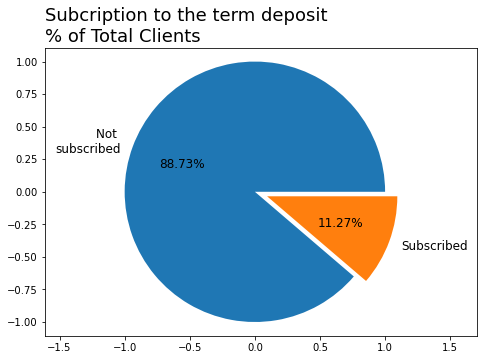

In [64]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)

fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')
plt.show()

### Insight: Through the pie chart, it is observed that out of all the total clients only 11.27% subscribed for the term deposits and the rest didn't.

In [56]:
df = data2[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]


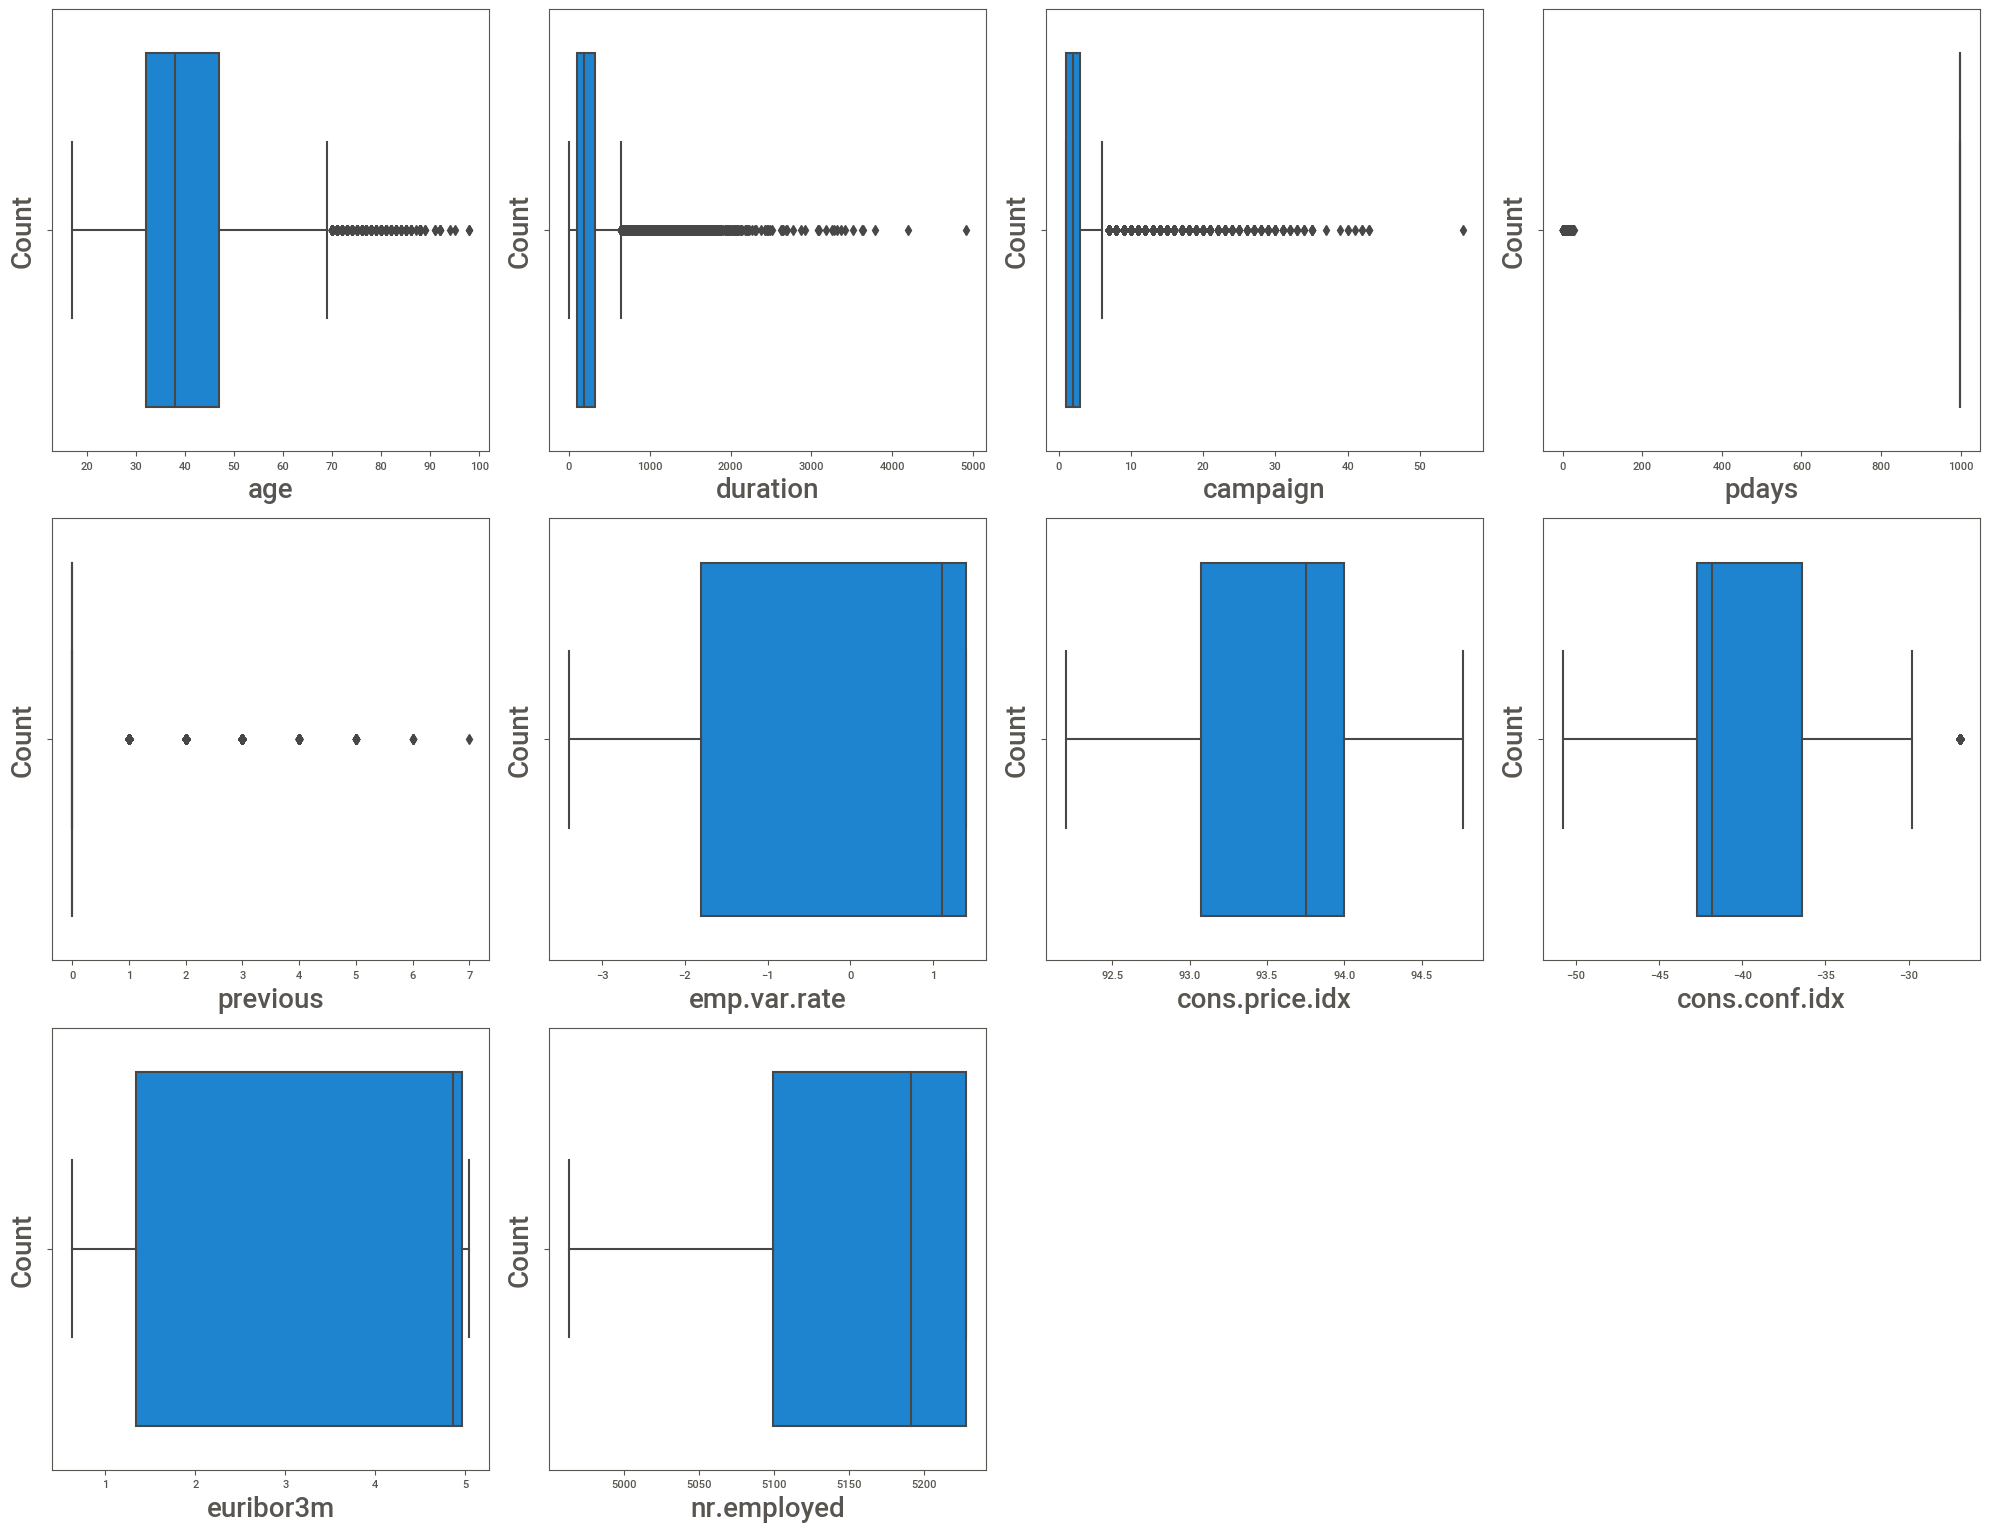

In [57]:
# Step 3 - Checking the outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [58]:
# Outliers found in age,duration,campaign,pdays,previous,cons.cof.idx

<AxesSubplot:xlabel='age', ylabel='Density'>

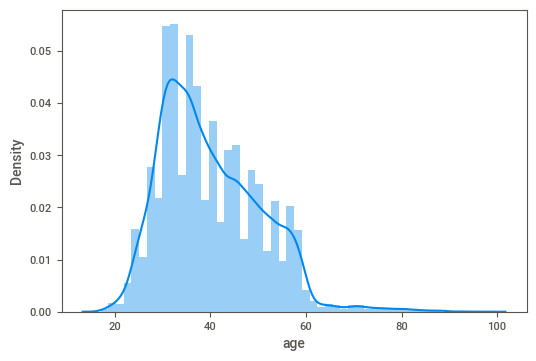

In [59]:
sns.distplot(data2.age) # Checking normal distribution

### Handling age outliers

In [18]:
upp_lim = data2.age.mean()+3*data2.age.std()
upp_lim

71.28781034874618

In [19]:
low_lim = data2.age.mean()-3*data2.age.std()
low_lim

8.760310463140776

In [20]:
len(data2.loc[data2['age']>upp_lim])


369

In [21]:
369/41188

0.008958920073807905

In [22]:
data2.loc[data2['age']>upp_lim,'age']=data.age.median()

<AxesSubplot:xlabel='age'>

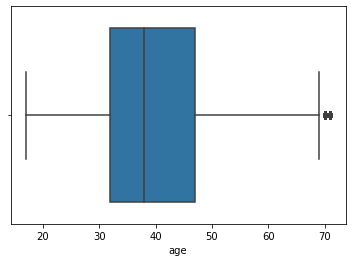

In [23]:
sns.boxplot(data2.age)

### Handling outliers of duration

<AxesSubplot:xlabel='duration', ylabel='Density'>

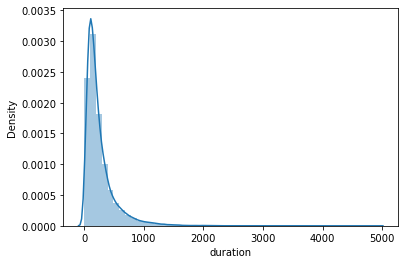

In [24]:
sns.distplot(data2.duration)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [25]:
from scipy import stats

In [26]:
IQR = stats.iqr(data2.duration,interpolation='midpoint')
IQR

217.0

In [27]:
Q1 = data2.duration.quantile(0.25)
Q3 = data2.duration.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [28]:
max_lim

644.5

In [29]:
min_lim

-223.5

In [30]:
len(data2.loc[data2['duration']>max_lim])/data2.shape[0]
# Here 7.1% of the data is above upper limit so we dont handle this feature because the percentage of outliers is >5%

0.07193842866854423

In [31]:
data2.loc[data2['duration']>max_lim,'duration']=data.duration.median()

### Handling outliers of campaign

<AxesSubplot:xlabel='campaign', ylabel='Density'>

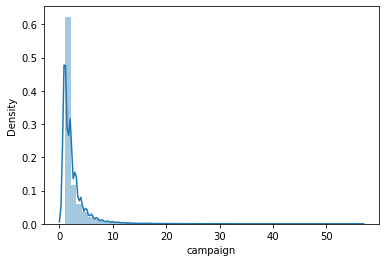

In [32]:
sns.distplot(data2.campaign)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [33]:
IQR = stats.iqr(data2.campaign,interpolation='midpoint')
IQR

2.0

In [34]:
Q1 = data2.campaign.quantile(0.25)
Q3 = data2.campaign.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [35]:
max_lim

6.0

In [36]:
min_lim

-2.0

In [37]:
len(data2.loc[data2['campaign']>max_lim])/data2.shape[0]
# Not handling because it represents the trend

0.058415072351170244

In [38]:
data2.loc[data2['campaign']>max_lim,'campaign']=data.campaign.median()

### Handling outliers of pdays

<AxesSubplot:xlabel='pdays', ylabel='Density'>

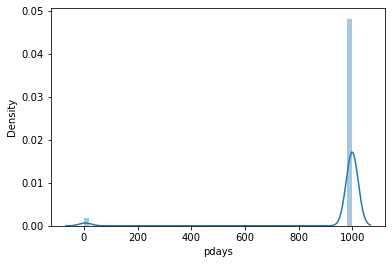

In [39]:
sns.distplot(data2.pdays)
# By looking at the graph we can see that there is high skewness  so here we use IQR 

In [40]:
IQR = stats.iqr(data2.pdays,interpolation='midpoint')
IQR

0.0

In [41]:
Q1 = data2.pdays.quantile(0.25)
Q3 = data2.pdays.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [42]:
min_lim

999.0

In [43]:
max_lim

999.0

In [44]:
len(data2.loc[data2['pdays']<min_lim])/data2.shape[0]
# Not handing because of no outliers

0.036782558026609694

In [45]:
data2.loc[data2['pdays']<min_lim,'pdays']=data.pdays.median()

### Handling outliers of previous

<AxesSubplot:xlabel='previous', ylabel='Density'>

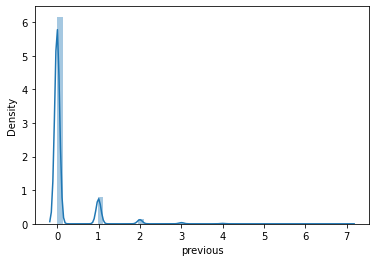

In [46]:
sns.distplot(data2.previous)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [47]:
IQR = stats.iqr(data2.previous,interpolation='midpoint')
IQR

0.0

In [48]:
Q1 = data2.previous.quantile(0.25)
Q3 = data2.previous.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [49]:
max_lim

0.0

In [50]:
min_lim

0.0

In [51]:
len(data2.loc[data2['previous']>max_lim])/data2.shape[0]
# Not handling because it is >5%

0.1365689035641449

### Handling of cons.conf.idx

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Density'>

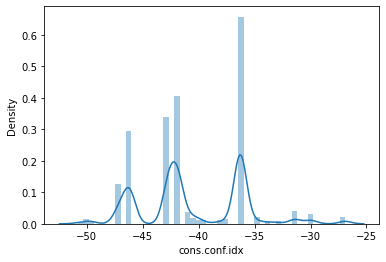

In [52]:
sns.distplot(data2['cons.conf.idx'])


In [53]:
IQR = stats.iqr(data2['cons.conf.idx'],interpolation='midpoint')
IQR

6.300000000000004

In [54]:
Q1 = data2['cons.conf.idx'].quantile(0.25)
Q3 = data2['cons.conf.idx'].quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [55]:
max_lim

-26.949999999999992

In [56]:
min_lim

-52.150000000000006

In [57]:
len(data2.loc[data2['cons.conf.idx']>max_lim])/data2.shape[0]


0.010852675536564048

In [58]:
data2.loc[data2['cons.conf.idx']>max_lim,'cons.conf.idx']=data2['cons.conf.idx'].median()

## Scaling the data

In [59]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431


In [60]:
from sklearn.preprocessing import RobustScaler
r_scale= RobustScaler()
data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=r_scale.fit_transform(data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

In [61]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,1.200000,1,0,0,0,6,1,0.496933,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.025736,0.101389,0.365252,0.863431
1,1.266667,1,0,0,0,6,1,-0.190184,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
2,-0.066667,1,0,1,0,6,1,0.282209,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
3,0.133333,1,0,0,0,6,1,-0.177914,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.261047,0.055647,0.365252,0.863431
4,1.200000,1,0,0,1,6,1,0.779141,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431


<AxesSubplot:xlabel='cons.conf.idx', ylabel='Density'>

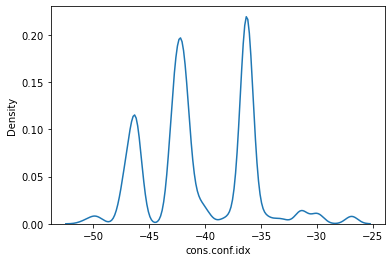

In [62]:
sns.kdeplot(data['cons.conf.idx'])

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Density'>

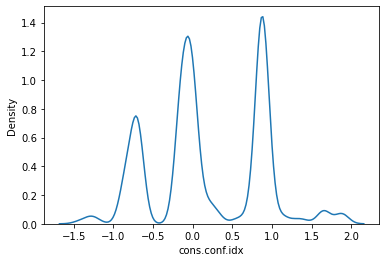

In [63]:
sns.kdeplot(data2['cons.conf.idx'])

# step 4 - Feature selection

In [106]:
# Checking redundant features
data2.describe()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.110652,1.168884,0.000073,0.547878,0.151695,4.230868,2.004613,0.132404,0.020807,0.0,0.172963,-0.318161,-0.188613,0.180269,-0.341639,-0.185768,0.112654,0.165656,0.218362,0.536314,0.757282
std,0.649382,0.603589,0.008534,0.497708,0.358729,2.320025,1.397575,0.834251,0.621181,0.0,0.494901,0.490925,0.629859,0.699210,0.479527,0.560089,0.316173,0.086770,0.097532,0.129764,0.267138
min,-1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.104294,-0.500000,0.0,0.000000,-1.406250,-1.684440,-1.428571,-1.167542,-1.762791,0.000000,0.021244,0.000437,0.365252,0.033335
25%,-0.400000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,-0.478528,-0.500000,0.0,0.000000,-0.906250,-0.733406,-0.142857,-0.971247,-0.712403,0.000000,0.070992,0.127294,0.365252,0.863431
50%,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163713,0.231014,0.634748,0.863431
75%,0.600000,2.000000,0.000000,1.000000,0.000000,6.000000,3.000000,0.521472,0.500000,0.0,0.000000,0.093750,0.266594,0.857143,0.028753,0.287597,0.000000,0.261047,0.337453,0.634748,0.863431
max,2.200000,2.000000,1.000000,1.000000,1.000000,9.000000,4.000000,2.846626,2.000000,0.0,7.000000,0.093750,1.107726,1.904762,0.051977,0.287597,1.000000,0.261047,0.337453,0.634748,0.863431


<AxesSubplot:>

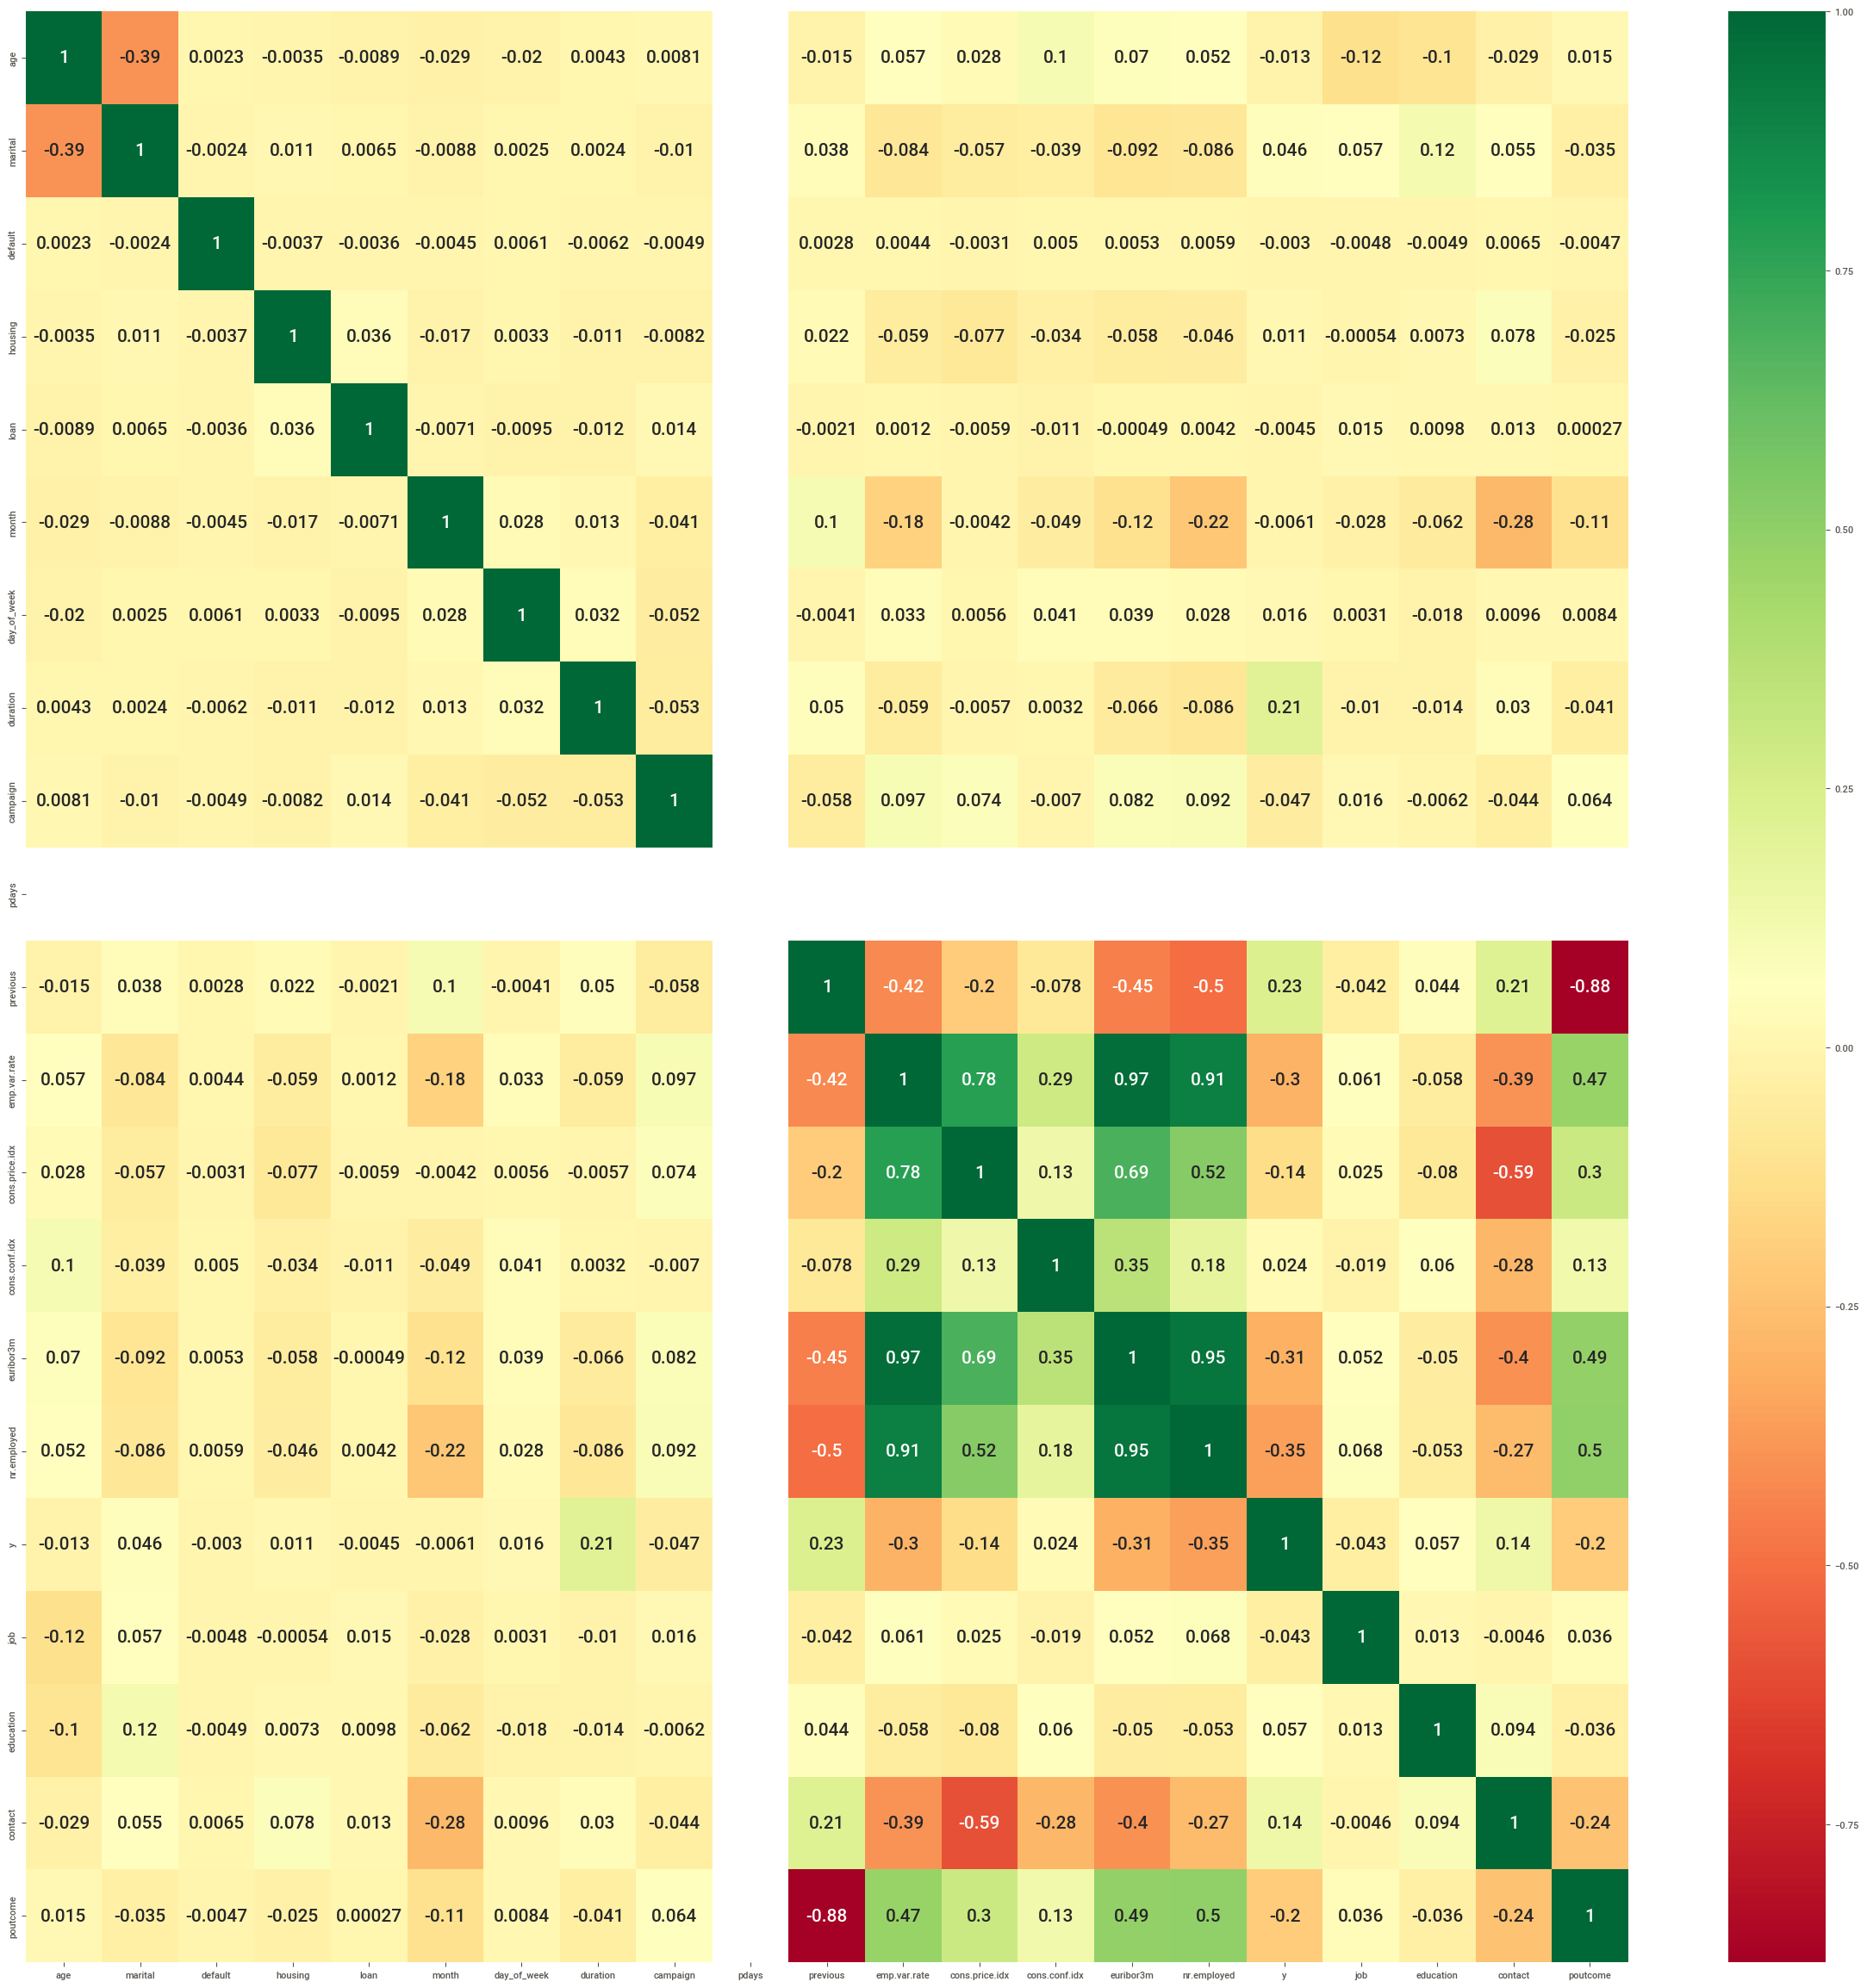

In [107]:
# Checking the correlation
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# step 5 Model Creation

In [108]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,1.200000,1,0,0,0,6,1,0.496933,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.025736,0.101389,0.365252,0.863431
1,1.266667,1,0,0,0,6,1,-0.190184,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
2,-0.066667,1,0,1,0,6,1,0.282209,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
3,0.133333,1,0,0,0,6,1,-0.177914,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.261047,0.055647,0.365252,0.863431
4,1.200000,1,0,0,1,6,1,0.779141,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431


In [109]:
data2.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job', 'education', 'contact', 'poutcome'],
      dtype='object')

In [110]:
# Defining x and y
X = data2[['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'previous','pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job', 'education', 'contact', 'poutcome']]
y = data2.y

In [111]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 36548, 1: 4640})
Counter({0: 36548, 1: 36548})


In [112]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=45,test_size=0.25)

## Decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
y_predic = dt.predict(X_test)

In [115]:
train_pred = dt.predict(X_train)

In [116]:
from sklearn.metrics import accuracy_score,classification_report,f1_score


In [117]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27407
           1       1.00      1.00      1.00     27415

    accuracy                           1.00     54822
   macro avg       1.00      1.00      1.00     54822
weighted avg       1.00      1.00      1.00     54822



In [118]:
print(classification_report(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9141
           1       0.92      0.93      0.92      9133

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274



In [119]:
pd.crosstab(y_test,y_predic)

col_0,0,1
y,,
0,8431,710
1,665,8468


In [120]:
from sklearn.model_selection import GridSearchCV

In [117]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [118]:
print(f"Best parameters :{best_params})")

Best parameters :{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [119]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [120]:
tree_cv.best_score_

0.9143119381240647

In [121]:
dt1=DecisionTreeClassifier(criterion='entropy',
                           max_depth=17,min_samples_leaf=1,
                           min_samples_split=3,splitter='best')

In [122]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=3)

In [123]:
y_pred = dt1.predict(X_test)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9141
           1       0.93      0.92      0.92      9133

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274



In [125]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,8464,677
1,692,8441


# Logestic Regression Model

In [127]:
## Model creation, linear model import logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #object of classify logistic regression
lr.fit(X_train,y_train)  ## training of the model

LogisticRegression()

In [146]:
y_pred=lr.predict(X_test)


In [147]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Evaluation of model

In [148]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , f1_score , precision_score

In [149]:
#checking accuracy score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7474006785597023


In [150]:
#checking classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      9141
           1       0.77      0.70      0.74      9133

    accuracy                           0.75     18274
   macro avg       0.75      0.75      0.75     18274
weighted avg       0.75      0.75      0.75     18274



In [151]:
#checking confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7237 1904]
 [2712 6421]]


In [152]:
#checking f1 score
f1score=f1_score(y_test,y_pred)
print(f1score)

0.7355939970214229


In [153]:
#checking precision score
precision=precision_score(y_test,y_pred)
print(precision)

0.7712912912912913


## Support Vector Machine

In [154]:
## Step 3 Model creation
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train,y_train)

SVC()

In [155]:
## Step 4 Prediction
y_pred=svclassifier.predict(X_test)

In [ ]:
train_predict = clf.predict(X_train)

In [156]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score


In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      9141
           1       0.81      0.69      0.75      9133

    accuracy                           0.77     18274
   macro avg       0.77      0.77      0.76     18274
weighted avg       0.77      0.77      0.76     18274



In [158]:
f1_score(y_test,y_pred)

0.7463180930975336

In [159]:
 pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,7676,1465
1,2824,6309


In [153]:
# checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(sv,x,y,cv=3,scoring='f1')
print(scores)
print("cross validation score:",scores.mean())
print("Std :",scores.std())

[0.94072215 0.72937905 0.27168901]
cross validation score: 0.6472634045531342
Std : 0.27923534760073776


In [154]:
from sklearn.model_selection import GridSearchCV
# Defining parameter range
param_grid ={'C' : [0.1,5,10,50,60,70],
             'gamma': [0.1,0.01,0.001,0.0001],
             'random_state':(list(range(1,20)))}
model=SVC()
grid = GridSearchCV(model,param_grid,refit = True,verbose=2,scoring='f1',cv=2)

#fitting the model with grid search
grid.fit(x,y)

Fitting 2 folds for each of 456 candidates, totalling 912 fits
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=  20.3s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=  10.5s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=  19.9s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=  10.6s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=  20.2s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=  10.5s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=  19.7s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=  10.4s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=  19.8s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=  10.5s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=  20.1s
[CV] END ...................C=0.1, gamma=0.1, 

[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=  22.7s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=  23.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=  23.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=  23.1s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=  20.3s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=  27.8s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=  19.7s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=  26.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=  21.4s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=  25.8s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=  24.1s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=  24.7s
[CV] END ................C=0

[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   8.9s
[CV] END ....................C=5, gamma=0.01, random_state=8; total time=  18.4s
[CV] END ....................C=5, gamma=0.01, random_state=8; total time=   9.0s
[CV] END ....................C=5, gamma=0.01, random_state=9; total time=  16.8s
[CV] END ....................C=5, gamma=0.01, random_state=9; total time=   8.8s
[CV] END ...................C=5, gamma=0.01, random_state=10; total time=  17.8s
[CV] END ...................C=5, gamma=0.01, random_state=10; total time=  10.2s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=  17.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   8.8s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=  16.8s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=  10.4s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=  17.4s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=1; total time=  13.4s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=  23.8s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=  13.4s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=  23.5s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=  13.1s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=  23.4s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=  13.2s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=  23.3s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=  13.2s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=  23.7s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=  13.2s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=  24.0s
[CV] END ...................

[CV] END .................C=10, gamma=0.001, random_state=14; total time=  12.3s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=  21.4s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=  12.8s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=  23.3s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=  12.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=  21.8s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=  13.1s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=  21.5s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=  12.2s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=  23.3s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=  12.6s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=  23.2s
[CV] END .................C=

[CV] END ...................C=50, gamma=0.01, random_state=8; total time=  12.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=  21.5s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=  14.4s
[CV] END ..................C=50, gamma=0.01, random_state=10; total time=  22.6s
[CV] END ..................C=50, gamma=0.01, random_state=10; total time=  11.9s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=  22.4s
[CV] END ..................C=50, gamma=0.01, random_state=11; total time=  12.4s
[CV] END ..................C=50, gamma=0.01, random_state=12; total time=  21.5s
[CV] END ..................C=50, gamma=0.01, random_state=12; total time=  12.0s
[CV] END ..................C=50, gamma=0.01, random_state=13; total time=  23.4s
[CV] END ..................C=50, gamma=0.01, random_state=13; total time=  11.7s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=  21.3s
[CV] END ..................C

[CV] END ....................C=60, gamma=0.1, random_state=2; total time=  15.5s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=  26.3s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=  15.4s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=  28.5s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=  15.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=  30.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=  18.6s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=  28.4s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=  15.1s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=  25.7s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=  15.1s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=  25.8s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=15; total time=  12.9s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=  22.9s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=  11.6s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=  22.4s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=  14.1s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=  22.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=  11.7s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=  24.9s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=  11.7s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=  23.1s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=  14.5s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=  24.5s
[CV] END .................C=

[CV] END ...................C=70, gamma=0.01, random_state=9; total time=  12.4s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=  21.7s
[CV] END ..................C=70, gamma=0.01, random_state=10; total time=  12.5s
[CV] END ..................C=70, gamma=0.01, random_state=11; total time=  21.9s
[CV] END ..................C=70, gamma=0.01, random_state=11; total time=  12.6s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=  21.9s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=  12.6s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=  21.9s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=  12.7s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=  22.1s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=  12.8s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=  21.9s
[CV] END ..................C

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [155]:
# print best parameter after tuning 
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'random_state': 1}


In [160]:

from sklearn.svm import SVC
clf=SVC(C=0.1, gamma=0.0001,random_state=1)

In [161]:
clf.fit(X_train,y_train)

SVC(C=0.1, gamma=0.0001, random_state=1)

In [162]:
y_hat = clf.predict(X_test)

In [163]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,7100,2041
1,2627,6506


In [164]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      9141
           1       0.76      0.71      0.74      9133

    accuracy                           0.74     18274
   macro avg       0.75      0.74      0.74     18274
weighted avg       0.75      0.74      0.74     18274



# Random Forest 

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
y_predict=rf_clf.predict(X_test)

In [167]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9141
           1       0.94      0.96      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [168]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,8612,529
1,322,8811


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=3, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50})


In [169]:


rf_clf1 = RandomForestClassifier(random_state=50,
                               verbose=3, n_jobs=-1,n_estimators= 200, max_features= 'sqrt',
               max_depth= 50, min_samples_split= 
                                 10,
               min_samples_leaf= 2)



In [170]:
rf_clf1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200
building tree 2 of 200building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200building tree 26 of 200

building tree 27 of 200
building tree 28 of 200
building tree 29 of 200


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s


building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.3s


building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.2s finished


RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=50, verbose=3)

In [171]:
y_pred = rf_clf1.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9141
           1       0.93      0.96      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [173]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,8506,635
1,330,8803


In [ ]:
print(f1_score(y_test,y_pred))

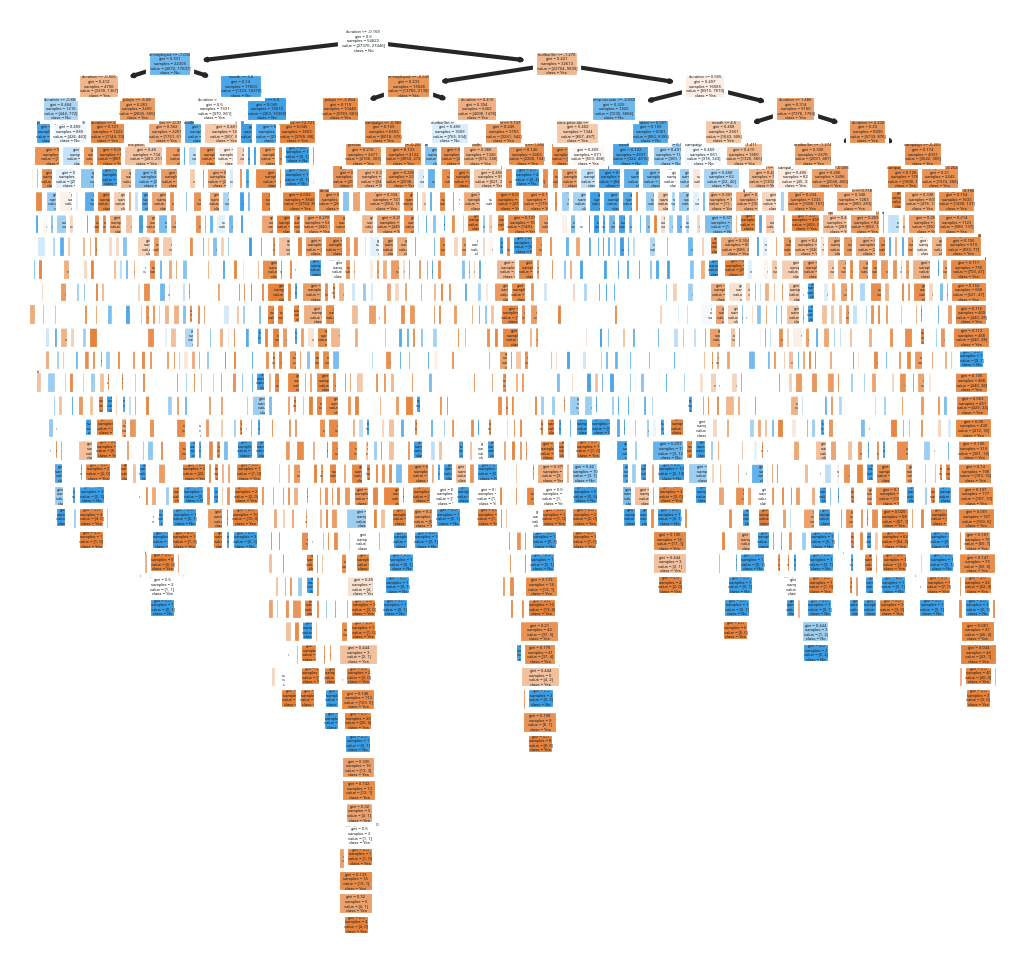

In [174]:
fn=['age', 'job', 'marital', 'educationt', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('imagename.png')
plt.show()

# Bagging using Logestic Regression

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier()
Bclas = BaggingClassifier(base_estimator=dt,n_estimators=100)
Bclas.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [175]:
y_pred = Bclas.predict(X_test)

In [176]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9141
           1       0.94      0.95      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [178]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,8555,586
1,414,8719


## Boosting

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
Xg = GradientBoostingClassifier(max_depth=80,learning_rate=0.1,n_estimators=1000)
Xg.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=80, n_estimators=1000)

In [180]:
y_pred = Xg.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,classification_report,recall_score

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9141
           1       0.93      0.93      0.93      9133

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274



In [183]:
import xgboost

In [185]:
# Model Creation
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_hat=xgb.predict(X_test)

In [188]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1189
           1       0.94      0.97      0.95      9108

    accuracy                           0.91     10297
   macro avg       0.80      0.74      0.77     10297
weighted avg       0.91      0.91      0.91     10297



In [189]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [190]:
rcv.fit(x_train, y_train)  #training data on randomsearch cv
cv_best_params = rcv.best_params_  #it will give you best parameters 
print(f"Best paramters: {cv_best_params})")  #printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 12.8, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.300000012, 'gamma': 0.8})


In [187]:
xgb2=XGBClassifier(reg_lambda= 0.1, reg_alpha= 12.8, n_estimators=100, max_depth=8, learning_rate=0.3, gamma=0.8)
xgb2.fit(X_train, y_train)      #training 
y_predict=xgb2.predict(X_test)    #testing
f1_score=f1_score(y_predict,y_test)   #checking performance

In [188]:
f1_score

0.9477726574500768

In [189]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9141
           1       0.95      0.95      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [190]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,8684,457
1,495,8638


# Conclusion : Among all the algorithms the random forest classifier performed best.